In [1]:
import webbrowser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
site1 = "https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb"
site2 = "http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/"
webbrowser.open_new_tab(site1)

True

In [19]:
#Create a dataset

X, y = sklearn.datasets.make_moons(200, noise =0.20)
print X[:5]
print y[:5]

[[ 1.03989865  0.59193858]
 [ 0.99249501 -0.47642822]
 [ 1.81392019  0.07867326]
 [-0.76946513  0.71650064]
 [ 1.83034996 -0.12892826]]
[0 1 1 0 1]


In [4]:
X[:,1][:5] #Cool. The [:,1] produces the 2nd column while the [:5] produces the top 5. The "," makes the difference.

array([ 0.39917614,  0.01421097, -0.17466799, -0.53218538, -0.40310119])

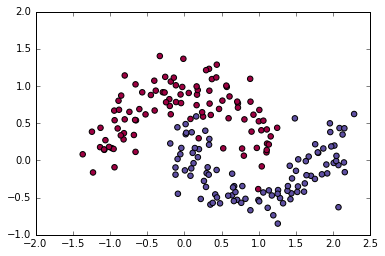

In [5]:
#Plotting the data
plt.scatter(X[:,0], X[:,1], s = 30, c = y, cmap=plt.cm.Spectral) #c=y changes the colors to red and blue

#Notice that below is not linearly seperable. This means that Logistic Regression (unless engineered with polynomials) won't work.
#Cool thing about Neural Networks is that you don't need to worry about feature engineering. Hidden layers do this for you.


In [6]:
#Fit using Logistic Regression

regr = LogisticRegression()
regr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
#Function for decision boundary
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

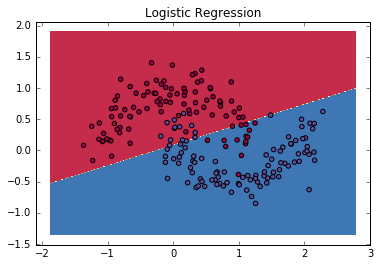

In [8]:
plot_decision_boundary(lambda x: regr.predict(x))
plt.title("Logistic Regression")

In [9]:
#Plotting and seeing results
regr.score(X,y)

0.85499999999999998

In [ ]:
#Train a Neural Network
#Need 2 inputs - (2 features)
#Need 2 ouputs - (0 or 1 classification)

In [10]:
#Define some parameters
num_examples = len(X)
nn_input_dim = 2 #2 dimensions 
nn_output_dim = 2 # Either 0 or 1

In [30]:
#Gradient Descent parameters
epsilon = 0.01 #learning rate (also alpha)
reg_lambda = 0.01 #Regularization strength

In [12]:
# Create Cross-Entropy loss model

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    #Forward propagation
    z1 = np.dot(X,W1) + b1
    a1 = np.tanh(z1) #Hidden layer
    z2 = np.dot(a1,W2) + b2
    
    #Softmax
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
    
    #Cross Entropy
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)
    
    #Regularization
    data_loss += reg_lamda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [13]:
# Helper function to predict output (0 or 1)

def predict(model, X):
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    #Forward propagation
    z1 = np.dot(X,W1) + b1
    a1 = np.tanh(z1) #Hidden layer
    z2 = np.dot(a1,W2) + b2
    
    #Softmax
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
    
    return np.argmax(probs, axis =1)

In [32]:
#Implement the BackProp Algorithm and Gradient Descent

#nn_hdim = number of nodes in hidden layer
#num_passes = number of passes for gradient descent
#print_loss = if True, print the loss every 1000 iterations

def build_model(nn_hdim, num_passes = 20000, print_loss = False):
    np.random.seed(0) #makes random number below the same with each initialization. more predictable
    
    #Initialize some random Weights and Biases
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    #This is what we add to, and return
    model = {}
    
    #Gradient Descent for each bach
    for i in xrange(0, num_passes):
        
        #Forward prop (like up above)
        z1 = np.dot(X,W1) + b1
        a1 = np.tanh(z1) #Hidden layer
        z2 = np.dot(a1,W2) + b2
        
        #Softmax
        exp_scores = np.exp(z2)
        probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True) 
        
        #Backprop
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis = 0, keepdims=True)
        delta2 = delta3.dot(W2.T)*(1-np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis = 0)
        
        #Adding Regularization
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        #Gradient Descent Parameter Update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        #Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        #Print out loss
        if print_loss and i % 1000 == 0:
            print "Loss after iteration {}: {}".format(i, calculate_loss(model))

    return model




Loss after iteration 0: 0.435255760059
Loss after iteration 1000: 0.015708329646
Loss after iteration 2000: 0.0139263985352
Loss after iteration 3000: 0.0134871367009
Loss after iteration 4000: 0.0133323726584
Loss after iteration 5000: 0.0132690555184
Loss after iteration 6000: 0.0132406708718
Loss after iteration 7000: 0.0132270048753
Loss after iteration 8000: 0.0132199812196
Loss after iteration 9000: 0.0132161323865
Loss after iteration 10000: 0.013213886623
Loss after iteration 11000: 0.0132124969196
Loss after iteration 12000: 0.0132115912944
Loss after iteration 13000: 0.0132109752152
Loss after iteration 14000: 0.0132105415409
Loss after iteration 15000: 0.0132102280602
Loss after iteration 16000: 0.0132099967682
Loss after iteration 17000: 0.0132098233598
Loss after iteration 18000: 0.0132096916744
Loss after iteration 19000: 0.0132095906193


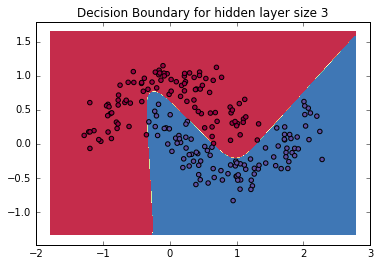

In [33]:
#Build a model with 3 nodes in a hidden layer
model = build_model(3, print_loss = True)

#Plot the  decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

In [21]:
#np.random.seed(0)
np.random.randn(5,2)

array([[-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877]])

In [20]:
y

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [21]:
len(y)

200

In [14]:
mod = {'W1': "some", 'b1': "thing"}
mod['W1']

'some'

In [15]:
x = np.array([[1],[2],[3]])
y = np.array([[1,2,3]])
y

array([[1, 2, 3]])

In [16]:
np.dot(x,y)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [17]:
x.dot(y)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])